In [61]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy


def draw_mst_overlay(G, T, pos, ax=None):
    """
    Draw the minimum spanning tree of a graph on top of the graph.
    """
    # If no axis is specified, create a new one
    if ax is None:
        ax = plt.gca()
    # Draw the graph
    nx.draw_networkx(G, pos=pos, ax=ax, node_color='tab:orange', edge_color='gray', node_size=500)

    # Draw the minimum spanning tree edges only
    nx.draw_networkx_edges(T, pos=pos, ax=ax, edge_color='tab:blue', width=5, alpha=0.5)

    # Draw edge weights
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=labels)

    # Remove the axis
    ax.axis('off')


def kruskals_algorithm(G, add_visualization=False, fig=None, pos=None):
    """
    Kruskal's algorithm for finding the minimum spanning tree of a graph.
    """

    steps = []

    # Initialize the minimum spanning tree
    T = nx.Graph()
    # Get the edges of the graph sorted by weight
    edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    # Add the nodes to the graph
    T.add_nodes_from(G.nodes())
    # Iterate over the edges
    for u, v, d in edges:
        # Check if adding the edge will create a cycle
        if not nx.has_path(T, u, v):
            # Add the edge to the minimum spanning tree
            T.add_edge(u, v, **d)

            # If visualization is enabled, draw the graph
            if add_visualization and fig is not None:
                steps.append(deepcopy(T))

    # If visualization is enabled, draw the graph
    if add_visualization and fig is not None:
        ncols = 2
        nrows = int(np.ceil(len(steps) / ncols))

        for i, T in enumerate(steps):
            ax = fig.add_subplot(nrows, ncols, i + 1)
            draw_mst_overlay(G, T, pos, ax=ax)
            ax.set_title(f'Step {i + 1}')

    # Return the minimum spanning tree
    return T

/tmp/ipykernel_39112/3553001801.py:18: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(T, pos=pos, ax=ax, edge_color='tab:blue', width=5, alpha=0.5)


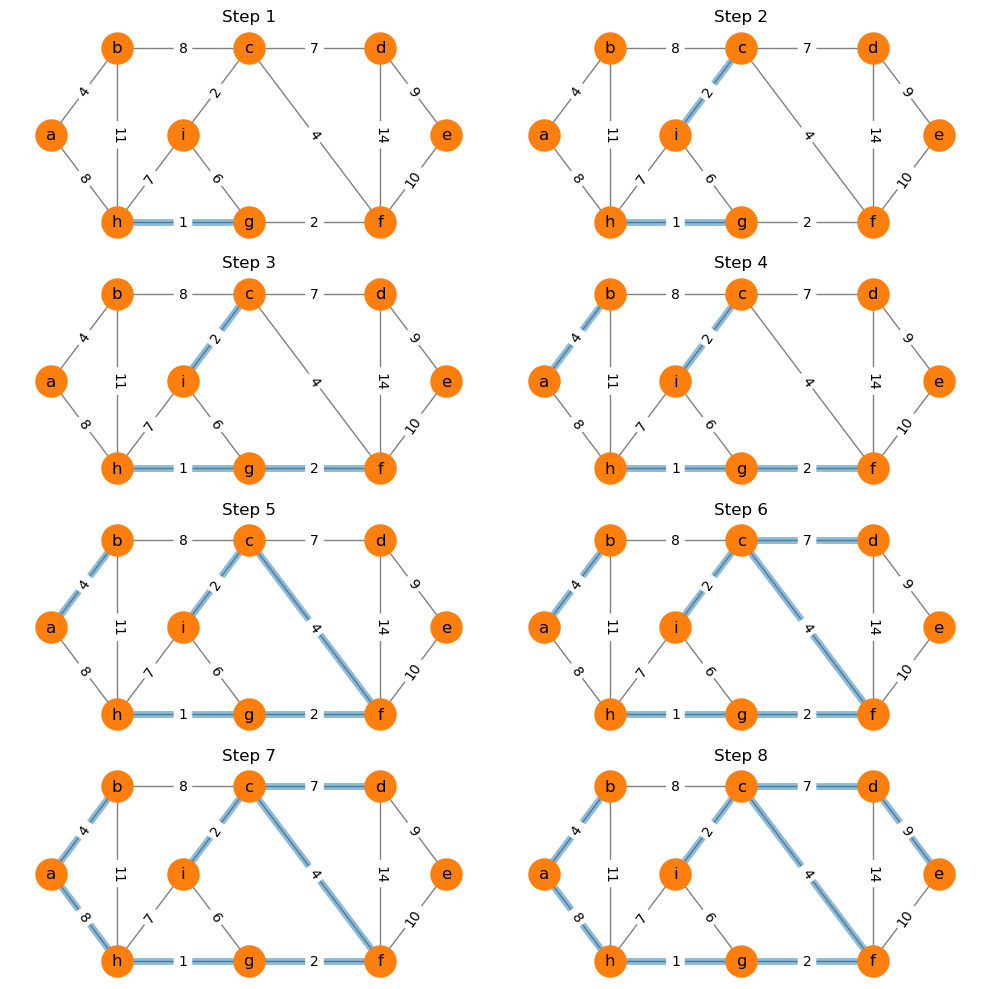

In [62]:
# Create a graph with nodes from a to i
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])

G.add_weighted_edges_from([('a', 'b', 4), ('a', 'h', 8), ('b', 'c', 8),
                            ('b', 'h', 11), ('c', 'd', 7), ('c', 'f', 4),
                            ('c', 'i', 2), ('d', 'e', 9), ('d', 'f', 14),
                            ('e', 'f', 10), ('f', 'g', 2), ('g', 'h', 1),
                            ('g', 'i', 6), ('h', 'i', 7)])

# Visualize the graph
pos = {
    'a': (0, 1),
    'b': (1, 2),
    'c': (3, 2),
    'd': (5, 2),
    'e': (6, 1),
    'f': (5, 0),
    'g': (3, 0),
    'h': (1, 0),
    'i': (2, 1)
}

fig = plt.figure(figsize=(10, 10))

# Find the minimum spanning tree
T = kruskals_algorithm(G, add_visualization=True, fig=fig, pos=pos)

# Resize figure to show all subplots
fig.tight_layout()

plt.show()